# Polynomial Regression

## Importing the libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


## Importing the dataset

In [47]:
dataset = pd.read_csv('Projected_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [48]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [49]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Training the Polynomial Regression model on the whole dataset

Choosing the random degree = 4

In [50]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Polynomial Regression results

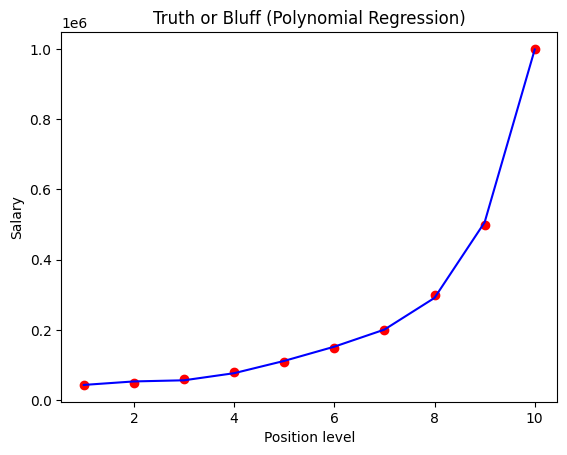

In [51]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

## Predicting a new result with Polynomial Regression

In [52]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([174878.07765173])

## Choosing a optimal degree.
Trying between 1 and 10
And training the Model and predicting with the Best Degree

In [53]:
# Define a function to create polynomial regression models with different degrees
def polynomial_regression(degree):
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])
    return model

# Evaluate models with different degrees using cross-validation
degrees = range(1, 10)  # Adjust the range as needed
mse_scores = []
for degree in degrees:
    model = polynomial_regression(degree)
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(-np.mean(scores))

# Choose the degree with the lowest mean squared error
best_degree = degrees[np.argmin(mse_scores)]
print("Best degree : ", best_degree)
best_model = polynomial_regression(best_degree)

# Train the best model on the entire training set
best_model.fit(X, y)

# Make predictions on the test set
y_pred = best_model.predict([[6.5]])
print(y_pred)

Best degree :  5
[174878.07765173]


## Finding the best Degree and Regularization - Ridge (L2) and Lasso (L1)

In [54]:

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Define a function to create polynomial regression models with different degrees and regularization
def polynomial_regression_with_regularization(degree, alpha, regularization_type='ridge'):
    if regularization_type == 'ridge':
        regressor = Ridge(alpha=alpha)
    elif regularization_type == 'lasso':
        regressor = Lasso(alpha=alpha)
    else:
        raise ValueError("Invalid regularization type")

    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', regressor)
    ])
    return model

# Evaluate models with different degrees and regularization parameters
degrees = range(1, 10)
alphas = [0.01, 0.1, 1, 10]  # Adjust alpha values as needed
regularization_types = ['ridge', 'lasso']

best_score = -np.inf
best_degree = None
best_alpha = None
best_regularization_type = None

for degree in degrees:
    for alpha in alphas:
        for regularization_type in regularization_types:
            model = polynomial_regression_with_regularization(degree, alpha, regularization_type)
            scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
            mean_score = -np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_degree = degree
                best_alpha = alpha
                best_regularization_type = regularization_type

# Train the best model on the entire training set
best_model = polynomial_regression_with_regularization(best_degree, best_alpha, best_regularization_type)
best_model.fit(X, y)

print("best degree :", best_degree)
print("best model :", best_model)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+10, tolerance: 7.046e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.620e+09, tolerance: 7.259e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.359e+09, tolerance: 7.701e

best degree : 9
best model : Pipeline(steps=[('poly_features', PolynomialFeatures(degree=9)),
                ('linear_regression', Ridge(alpha=0.01))])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+08, tolerance: 7.046e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.801e+08, tolerance: 7.259e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.544e+08, tolerance: 7.701e

In [55]:
print("predicted salary :", best_model.predict([[6.5]]))

predicted salary : [171423.73889755]
